In [ ]:
#temperature forecasting using rnn

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0081 - val_loss: 0.0044
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 9/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 10/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 11/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 12/20
1750/1750 ━━━━━━━━━━━━━━━━━━

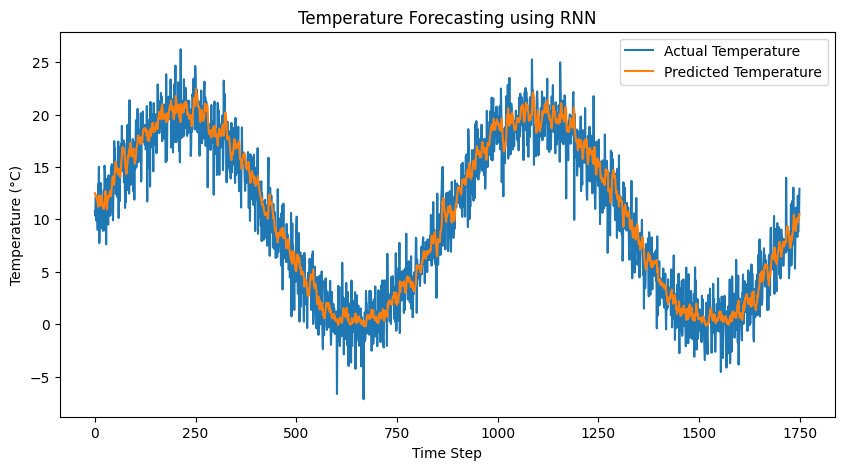

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Load Dataset
df = pd.read_csv('/content/synthetic_temperature_data.csv')

# Step 2: Data Preprocessing
df['datetime'] = pd.to_datetime(df['datetime'])  # Let pandas infer the format
df.set_index('datetime', inplace=True)
data = df[['CityTemp']].values

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

# Reshape for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 4: Build RNN Model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_data=(X_test, y_test))

# Step 6: Evaluate Model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")

# Step 7: Predict and Plot Results
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual Temperature')
plt.plot(y_pred_inv, label='Predicted Temperature')
plt.title('Temperature Forecasting using RNN')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
